# Predicting the Median Sale's Price Of A House Using Machine Learning

### 1. Problem Definition:
>
using various feature(data) can the price of any house in a particular area be predicted.

### Evaluation Metric:
> The problem would be evaluated using the Mean_sqaured_error and Root_Mean_Squared_Error between the actual price and the predicted price. The model would be evaluated to a 85-95% accuracy.

### Data:
> The data used is the californai housing census data.

### Features :
The following are the features of the dataset
>    
    1.  longitude           
    2.  latitude            
    3.  housing_median_age  
    4.  total_rooms         
    5.  total_bedrooms      
    6.  population          
    7.  households          
    8.  median_income       
    9.  median_house_value  
    10. ocean_proximity

#  

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
                                  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import (StratifiedShuffleSplit, cross_val_score,
                                     RandomizedSearchCV, )

plt.style.use('seaborn')

###  Load the data

In [3]:
DATAPATH  = 'data/california/'

def load_data():
    file = os.path.join(DATAPATH, 'housing.csv')
    return pd.read_csv(file, date_parser=True, low_memory=True)
housing = load_data()

### Exploring the data

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The dataset have a total of 9 features including the label feature, out of the 9 attributes 8 of them are of `numerical data type (float64)` while one is of the `object data type`.

In [5]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


20640 total samples with the `total_bedrooms` feature having 207 missing values

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

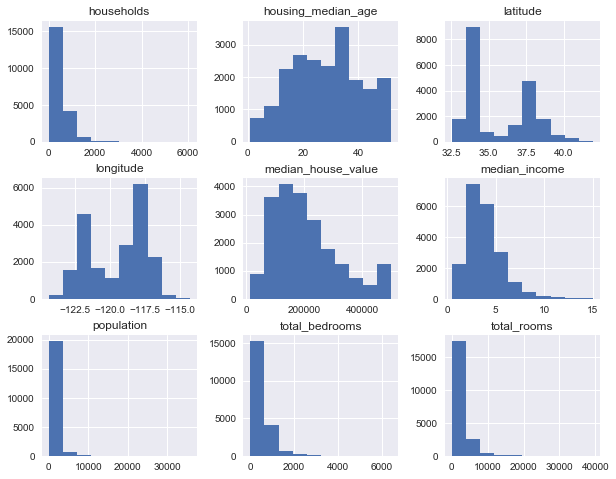

In [8]:
# plotting the histogram of the numerical features
housing.hist(figsize=(10, 8), bins=10)
plt.show()

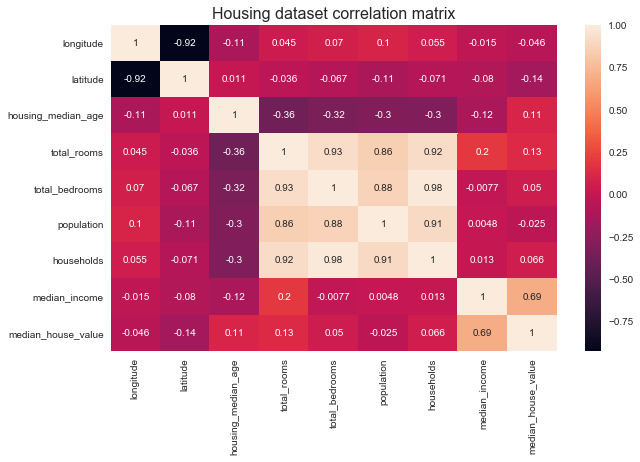

In [9]:
# heat map of the correlation
corr_mat = housing.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_mat, annot=True)
plt.title('Housing dataset correlation matrix', fontsize=16)
plt.show()

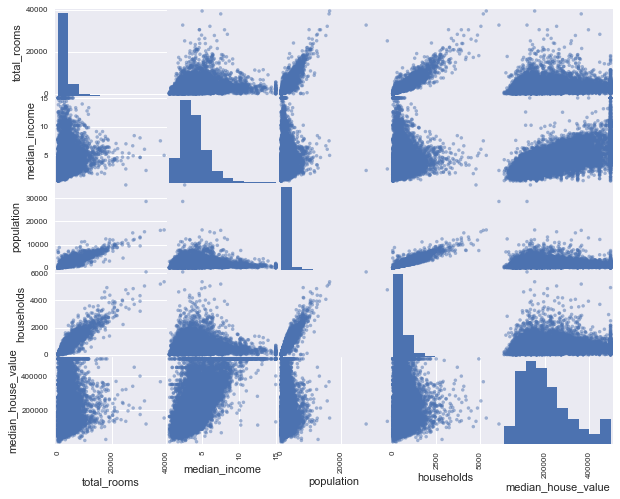

In [10]:
# plotting a scatter matrix of some features 
features = [ 'total_rooms', 'median_income', 'population',
            'households', 'median_house_value']
scatter_matrix(housing[features], figsize=(10, 8))
plt.show()

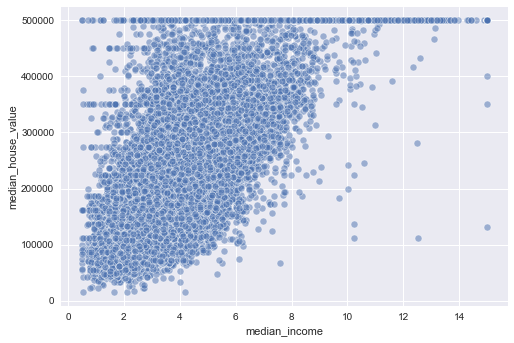

In [11]:
# Since the median_income features shows more correlation, we plot to check for outliers
sns.scatterplot('median_income', 'median_house_value', data=housing, alpha=0.5)
plt.show()

From the above scatter plot, outliers in this feature start from point 8 mark($80,000).with that in mind we would create a train and test set using stratified sampling, where the median_income feature would be categoried in 5 samples.

## Creating a train and test set using stratifiedshufflesplit

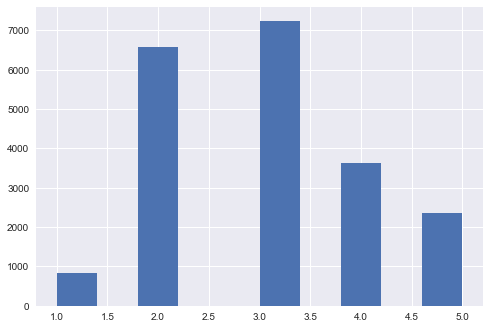

In [12]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]
                              )
housing['income_cat'].hist()
plt.show()

In [13]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [14]:
test_set['income_cat'].value_counts() / len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
# removing the income_cat feature from both sets
for feature in (train_set, test_set):
    feature.drop('income_cat', axis=1, inplace=True)

In [16]:
'income_cat' not in test_set.columns, 'income_cat' not in train_set.columns

(True, True)

In [17]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [18]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8297,-118.14,33.76,50.0,2960.0,761.0,1179.0,718.0,3.5214,398100.0,NEAR OCEAN
17602,-121.88,37.30,42.0,1867.0,398.0,927.0,389.0,4.3250,247000.0,<1H OCEAN
5912,-118.44,34.29,32.0,1260.0,382.0,1434.0,342.0,2.0286,122900.0,<1H OCEAN
5050,-118.33,34.02,11.0,1249.0,313.0,625.0,336.0,0.8702,170500.0,<1H OCEAN
7161,-118.17,34.03,31.0,1014.0,252.0,1064.0,247.0,2.4167,125500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
12292,-116.98,33.93,33.0,376.0,83.0,267.0,88.0,2.1581,68300.0,INLAND
11810,-121.07,38.92,15.0,5301.0,884.0,2335.0,831.0,4.5150,164000.0,INLAND
19906,-119.27,36.32,9.0,3631.0,635.0,1881.0,628.0,4.7723,113100.0,INLAND
9682,-118.97,37.64,14.0,1847.0,439.0,238.0,98.0,3.6042,137500.0,INLAND


## Visualizing the data

In [20]:
housing = train_set.copy()

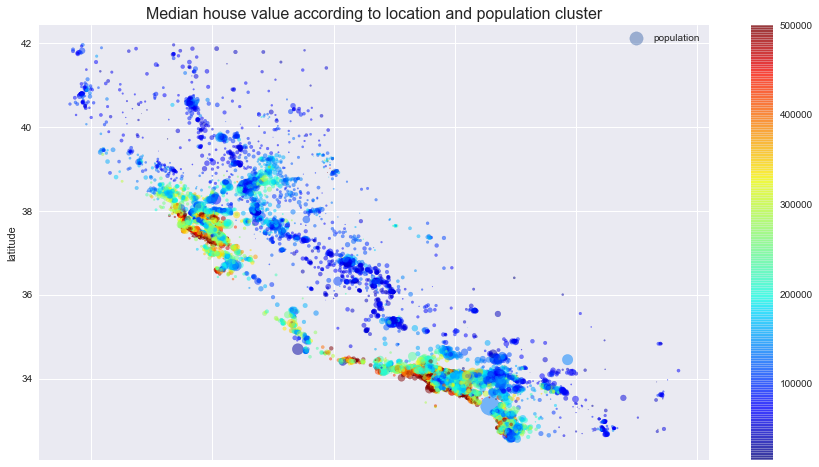

In [21]:
housing.plot(y='latitude', x='longitude', 
             kind='scatter', s=housing['population']/100, 
             c=housing['median_house_value'], cmap='jet', 
            alpha=0.5, label='population', figsize=(15, 8))

plt.title('Median house value according to location and population cluster', fontsize=16)
plt.xlabel('Longitude')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### Adding more feature

In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] =housing['population']/housing['households']

In [23]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
8297,-118.14,33.76,50.0,2960.0,761.0,1179.0,718.0,3.5214,398100.0,NEAR OCEAN,4.122563,0.257095,1.642061
17602,-121.88,37.30,42.0,1867.0,398.0,927.0,389.0,4.3250,247000.0,<1H OCEAN,4.799486,0.213176,2.383033
5912,-118.44,34.29,32.0,1260.0,382.0,1434.0,342.0,2.0286,122900.0,<1H OCEAN,3.684211,0.303175,4.192982
5050,-118.33,34.02,11.0,1249.0,313.0,625.0,336.0,0.8702,170500.0,<1H OCEAN,3.717262,0.250600,1.860119
7161,-118.17,34.03,31.0,1014.0,252.0,1064.0,247.0,2.4167,125500.0,<1H OCEAN,4.105263,0.248521,4.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12292,-116.98,33.93,33.0,376.0,83.0,267.0,88.0,2.1581,68300.0,INLAND,4.272727,0.220745,3.034091
11810,-121.07,38.92,15.0,5301.0,884.0,2335.0,831.0,4.5150,164000.0,INLAND,6.379061,0.166761,2.809868
19906,-119.27,36.32,9.0,3631.0,635.0,1881.0,628.0,4.7723,113100.0,INLAND,5.781847,0.174883,2.995223
9682,-118.97,37.64,14.0,1847.0,439.0,238.0,98.0,3.6042,137500.0,INLAND,18.846939,0.237683,2.428571


### Preparing the data for machine learning algorithm

In [24]:
housing_feature = train_set.drop('median_house_value', axis=1)
housing_label = train_set['median_house_value']

In [25]:
housing_feature

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8297,-118.14,33.76,50.0,2960.0,761.0,1179.0,718.0,3.5214,NEAR OCEAN
17602,-121.88,37.30,42.0,1867.0,398.0,927.0,389.0,4.3250,<1H OCEAN
5912,-118.44,34.29,32.0,1260.0,382.0,1434.0,342.0,2.0286,<1H OCEAN
5050,-118.33,34.02,11.0,1249.0,313.0,625.0,336.0,0.8702,<1H OCEAN
7161,-118.17,34.03,31.0,1014.0,252.0,1064.0,247.0,2.4167,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
12292,-116.98,33.93,33.0,376.0,83.0,267.0,88.0,2.1581,INLAND
11810,-121.07,38.92,15.0,5301.0,884.0,2335.0,831.0,4.5150,INLAND
19906,-119.27,36.32,9.0,3631.0,635.0,1881.0,628.0,4.7723,INLAND
9682,-118.97,37.64,14.0,1847.0,439.0,238.0,98.0,3.6042,INLAND


In [26]:
# checking for missing values
housing_feature.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [27]:
# OnehotEncoding step refresher
cat_tr = OneHotEncoder()
cat_trnd = cat_tr.fit_transform(housing_feature['ocean_proximity'].values.reshape(-1,1))
cat_trnd

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
cat_features = [column for column in housing_feature.columns if housing_feature[column].dtype == 'object']
cat_features

['ocean_proximity']

In [29]:
# SimpleImputer and StandardScaler refresher
num_pipeline = Pipeline([
    ('num_pipe', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('num_scale', StandardScaler())
    ])
num = num_pipeline.fit_transform(housing_feature.drop('ocean_proximity', axis=1))
pd.DataFrame(num, columns=housing_feature.drop('ocean_proximity', axis=1).columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.711530,-0.873284,1.693645,0.143522,0.523772,-0.223179,0.564636,-0.184483
1,-1.156170,0.784013,1.060803,-0.358403,-0.336961,-0.447532,-0.295589,0.239987
2,0.561714,-0.625158,0.269749,-0.637149,-0.374900,0.003845,-0.418478,-0.972996
3,0.616646,-0.751562,-1.391462,-0.642200,-0.538510,-0.716400,-0.434166,-1.584876
4,0.696548,-0.746880,0.190644,-0.750116,-0.683152,-0.325562,-0.666871,-0.767998
...,...,...,...,...,...,...,...,...
16507,1.290816,-0.793697,0.348855,-1.043097,-1.083879,-1.035124,-1.082603,-0.904593
16508,-0.751668,1.542437,-1.075041,1.218551,0.815426,0.805997,0.860093,0.340347
16509,0.147225,0.325213,-1.549673,0.451657,0.225005,0.401805,0.329316,0.476255
16510,0.297040,0.943188,-1.154146,-0.367588,-0.239743,-1.060943,-1.056456,-0.140748


In [30]:
num_features = [column for column in housing_feature.columns if not housing_feature[column].dtype == 'object']
num_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [31]:
# making a pipeline for the numerical feature

def data_transformer(dataframe):
    """
    This function carries out data proprocessing steps on a a given dataset passed into the function.
    dataframe : The data set to be transformed.
    num_attr : holds a list of all numerical features in the data set.
    cat_features : list of all the categorical features of the data set
    num_pipeline : pipeline class that holds the steps in filling in missing values and scaling the 
                    numerical features of the dataset.
    dataframe_pipeline : ColumnTransformer class for preprocessing both 
                    numerical and categorical attributes of the dataset.
    """
    num_attr = [column for column in dataframe.columns if not dataframe[column].dtype == 'object']
    cat_features = [column for column in dataframe.columns if dataframe[column].dtype == 'object']
    
    num_pipeline = Pipeline([
        ('num_pipe', SimpleImputer(strategy='median', missing_values=np.nan)),
        ('num_scale', StandardScaler())
        ])
    
    dataframe_transformer = ColumnTransformer([
        ('num_features', num_pipeline, num_attr),
        ('cat', OneHotEncoder(), cat_features),
    ])
    dataframe_prepared = dataframe_transformer.fit_transform(dataframe)
    return dataframe_prepared 
housing_prepared = data_transformer(housing_feature)
housing_prepared.shape

(16512, 13)

In [80]:
def build_simple_model(X_true, y_true):
    model = SVR(kernel='linear',
                gamma='scale',
                C= 100).fit(X_true, y_true)
    model_score = model.score(X_true, y_true)
    y_preds = model.predict(X_true)
    model_mse = mean_squared_error(y_true, y_preds)
    model_rmse = np.sqrt(model_mse)
    score = {'model score':model_score, 
            'model_mse' : model_mse,
            'model_rmse' : model_rmse,
            }
    return score 
# build_simple_model(housing_prepared, housing_label)

In [33]:
def save_model(data, filename):
    ''' This file saves a created model int a given file name
        data : The name of the model/model function 
        filename : The pickle extension file wher the model is saved
    '''
    try :
        os.mkdir('models/')
    except FileExistsError as e:
        pass
    file = os.path.join('models/', filename)
    pickle.dump(data, open(file, 'wb'))

In [52]:
# saving the two built models
save_model(build_simple_model, 'simple_model.pkl')
save_model(build_simple_model, 'simple_model2.pkl')

In [35]:
model1 = pickle.load(open('models/simple_model.pkl', 'rb'))
model1(housing_prepared, housing_label)

{'model score': -0.049102890051368586,
 'model_mse': 14037805025.733435,
 'model_rmse': 118481.24334987979}

In [53]:
# loading a model with pickle to check if it works
model2 = pickle.load(open('models/simple_model2.pkl', 'rb'))
model2(housing_prepared, housing_label)

{'model score': 0.6174785179771967,
 'model_mse': 5118432170.678497,
 'model_rmse': 71543.21890073508}

### Using Cross validation 

In [74]:
cross_est = SVR(kernel='linear',
                gamma='scale',
                C= 100)
cross_score = cross_val_score(cross_est,
                              housing_prepared,
                              housing_label,
                              cv=5, scoring='neg_mean_squared_error',
                              n_jobs=-1
                             )
cross_score_rmse = np.sqrt(-cross_score)
print(cross_score)
print(cross_score_rmse)

[-5.00188076e+09 -4.85086630e+09 -5.14155811e+09 -4.95583023e+09
 -4.83340309e+09]
[70723.97587461 69648.16078162 71704.65894035 70397.65786796
 69522.68039355]


In [91]:
# mean and standard devaition score of the cross_val_score output
print(f'Mean of score : {np.mean(cross_score_rmse)}\n Std of score : {np.std(cross_score_rmse)}')

Mean of score : 70399.42677161902
 Std of score : 792.7232887659108


### Tuning the hyperparameter with RandomizedSearchCV

In [82]:
# using RandomizedSearchCv to get the best hyperparameter for the model
rand_param = [
    {'kernel': ['linear'],'C' : [1, 25, 50, 100, 1000], 'gamma':['auto','scale']},
    {'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'], 
     'C':[10, 15, 50, 100]}
]
est = SVR()
rand_model = RandomizedSearchCV(est, 
                                n_jobs=-1, 
                                param_distributions=rand_param, 
                                scoring='neg_mean_squared_error', 
                                cv=5, verbose=0)
rand_model.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [1, 25, 50, 100, 1000],
                                         'gamma': ['auto', 'scale'],
                                         'kernel': ['linear']},
                                        {'C': [10, 15, 50, 100],
                                         'kernel': ['rbf', 'linear', 'poly',
                                                    'sigmoid']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [83]:
rand_model.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 100}

In [84]:
rand_model.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
results = rand_model.cv_results_
for result, attr in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-result), attr)

80604.54034171868 {'kernel': 'linear', 'C': 15}
106242.11083252227 {'kernel': 'rbf', 'C': 50}
71943.12908143396 {'kernel': 'linear', 'gamma': 'scale', 'C': 100}
113084.85963263875 {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
108180.5851656635 {'kernel': 'poly', 'C': 50}
76620.46154164299 {'kernel': 'linear', 'gamma': 'scale', 'C': 25}
110840.95572862169 {'kernel': 'sigmoid', 'C': 15}
71943.12908143396 {'kernel': 'linear', 'C': 100}
73584.83876333424 {'kernel': 'linear', 'gamma': 'scale', 'C': 50}
103426.20839719598 {'kernel': 'poly', 'C': 100}


### Estimating on the test set 

In [98]:
final_model = rand_model.best_estimator_
test_feature = test_set.drop('median_house_value', axis=1)
test_label = test_set['median_house_value']

# processing the X_test
X_test_prepared = data_transformer(test_feature)

final_model_score = final_model.score(X_test_prepared, test_label)
final_model_score*100
y_preds = final_model.predict(X_test_prepared)
final_model_mse = mean_squared_error(test_label, y_preds)
final_model_rmse = np.sqrt(final_model_mse) 
score = {'Score' : final_model_score,
         'mse_score':final_model_mse,
         'rmse_score':final_model_rmse,
         'cross_val_score':70399.42
        }
data = pd.DataFrame(score.values(), index=score.keys())
data

,0
Score,6.197002e-01
mse_score,4.964275e+09
rmse_score,7.045761e+04
cross_val_score,7.039942e+04


In [99]:
# save final model score to pickle
pickle.dump(data, open('models/final_model_score.pkl', 'wb'))

The model increased it's accuracy from 49.1% in the first model to 61.7% in the second model when estimating on the training set, but when estimating on the test set the accuracy increased to 61.9% (+0.23).

**The prediction errors are as follows**

    1. first model     | 118481
    2. second model    | 71543
    3. cross val model | 70399
    4. final model     | 70457